# Homework 4: Data Visualization
- **Name**:  Siddarth Goud Gundrathi
- **UB Username**: sgundrat
- **UB Person Number**:  50527922

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

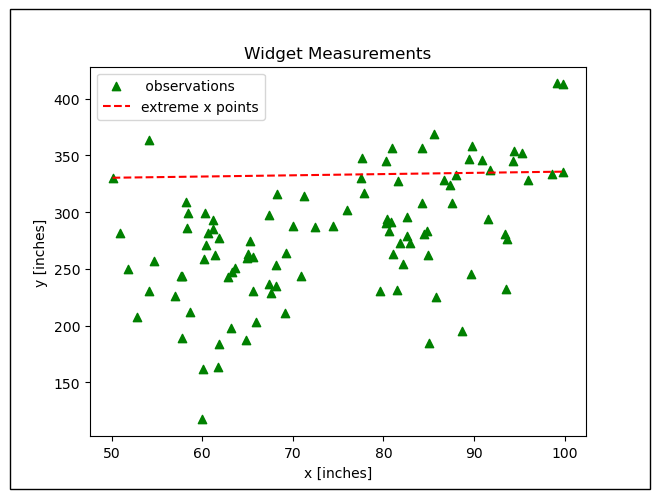

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

# Read the data from the CSV file and skip lines starting with '%'
data = pd.read_csv("scatter_data.csv", comment="%", delimiter="\t", header=None)

# Split the data into "x" and "y" columns
data = data[0].str.split(',', expand=True)
data.columns = ["x", "y"]

# Convert the "x" and "y" columns to numeric (in case they are read as strings)
data["x"] = pd.to_numeric(data["x"])
data["y"] = pd.to_numeric(data["y"])

# Create a scatter plot with green triangles
plt.scatter(data["x"], data["y"], marker="^", color="green", label=" observations ")

# Calculate the minimum and maximum x-values
min_x = data["x"].min()
max_x = data["x"].max()

# Find the corresponding y-values for the left-most and right-most points
y_min_x = data.loc[data["x"] == min_x, "y"].values[0]
y_max_x = data.loc[data["x"] == max_x, "y"].values[0]

# Create a red dashed line from the left-most point to the right-most point
plt.plot([min_x, max_x], [y_min_x, y_max_x], color="red", linestyle="--", label="extreme x points")

# Set plot title and axis labels
plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")

fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Problem 2 - Histogram

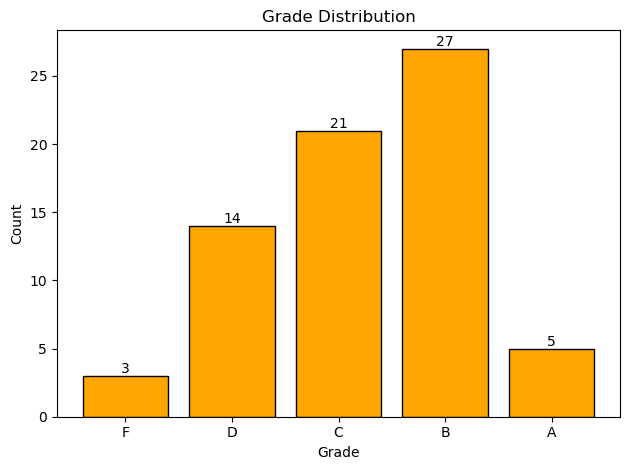

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('student_grades.csv', comment='%')
data.columns = ["studentID", "Score"]  # Rename the columns

bins = [0, 60, 70, 80, 90, 100]
labels = ["F", "D", "C", "B", "A"]

data['Grade'] = pd.cut(data['Score'], bins=bins, labels=labels, include_lowest=True)
grade_counts = data['Grade'].value_counts().reindex(labels, fill_value=0)

plt.bar(grade_counts.index, grade_counts, align='center', color='orange', edgecolor='black')

for x, y in zip(grade_counts.index, grade_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xticks(grade_counts.index, labels)
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

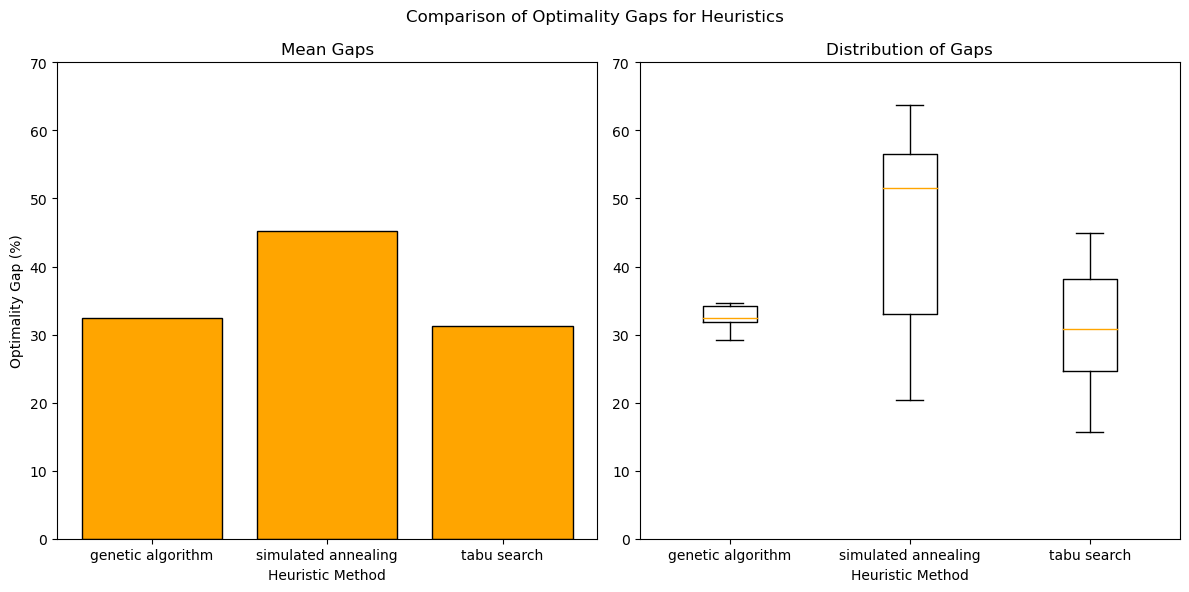

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file, ignoring lines that start with '%'
data = pd.read_csv("solution_data.csv", comment="%", header=None)
data.columns = ["Problem", "SolnMethod", "Value"]

# Calculate the optimality gaps for each heuristic
optimal_values = data[data['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristic_values = data[data['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
optimality_gaps = (optimal_values - heuristic_values) / optimal_values * 100

# Reset the index of the Series
optimality_gaps = optimality_gaps.reset_index()

# Create a DataFrame for the bar plot
barplot_data = pd.DataFrame({
    'Heuristic': optimality_gaps['SolnMethod'],
    'Optimality Gap': optimality_gaps['Value']
})

# Get the average optimality gaps for specific heuristics
optimality_gaps = optimality_gaps.reset_index()
average_gaps = barplot_data[barplot_data['Heuristic'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# First subplot: Barplot of average optimality gaps
axes[0].bar(average_gaps['Heuristic'], average_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
axes[0].set_ylim([0, 70])

# Second subplot: Boxplot of spread of optimality gaps
data_boxplot = [optimality_gaps[optimality_gaps['SolnMethod'] == method]['Value'] for method in optimality_gaps['SolnMethod'].unique()]

# Create the boxplot
bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['SolnMethod'].unique(), patch_artist=False, medianprops={'color': 'orange'})

# Set custom labels and positions for the x-axis ticks
custom_labels = optimality_gaps['SolnMethod'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")
axes[1].set_ylim([0, 70])
axes[1].set_ylim(axes[0].get_ylim())
# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()


--- 
## Part 2 - Explore New Plot Types

The code creates a hexbin plot to visualize the relationship between sepal length and sepal width in the Iris dataset using Seaborn and Matplotlib. The Iris dataset contains measurements of sepal and petal dimensions for different species of iris flowers.

The hexbin plot is chosen for this data because it helps visualize the density of data points in a 2D space. This is particularly useful when dealing with a large number of data points, as it aggregates points into hexagonal bins and uses color intensity to represent the density of points in each bin.

In this specific plot, it shows how sepal length and sepal width are distributed. The x-axis represents sepal length in centimeters, the y-axis represents sepal width in centimeters, and the color intensity of the hexagons indicates the density of data points in different regions of the plot. This type of plot is chosen to understand the concentration of iris data points in the sepal length vs. sepal width space, which is essential for visualizing the relationships between these two features.

- **URL of Example Code**: https://seaborn.pydata.org/examples/hexbin_marginals.html
- **URL of Sample Data**:  https://github.com/mwaskom/seaborn-data/blob/master/iris.csv

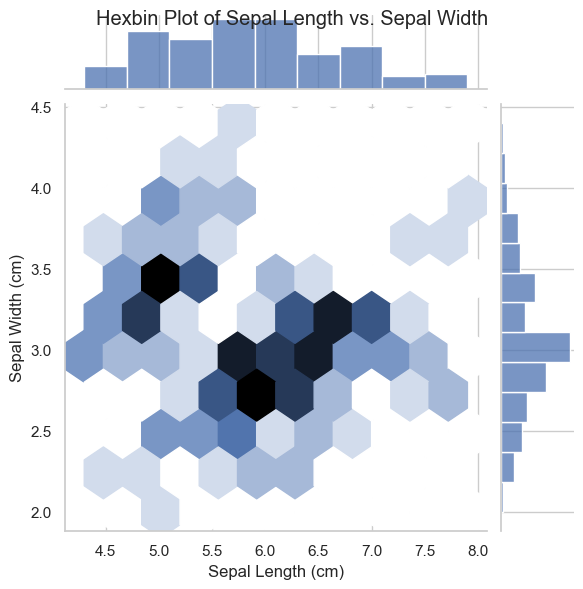

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Create a hexbin plot to visualize the relationship between sepal length and sepal width
sns.set(style="whitegrid")
g = sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex", color="b")

# Customize the plot
g.ax_joint.set_xlabel("Sepal Length (cm)")
g.ax_joint.set_ylabel("Sepal Width (cm)")
plt.suptitle("Hexbin Plot of Sepal Length vs. Sepal Width")

# Show the plot
plt.show()
